In [1]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


'\nPurpose: To run the soma splitting \non the processed neurons\n\n'

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-13 23:25:41,406 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-13 23:25:41,408 - settings - Setting database.user to celiib
INFO - 2021-01-13 23:25:41,409 - settings - Setting database.password to newceliipass
INFO - 2021-01-13 23:25:41,411 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-13 23:25:41,412 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-13 23:25:41,423 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-13 23:25:41,705 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-13 23:25:41,796 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-13 23:25:41,797 - settings - Setting database.user to celiib
INFO - 2021-01-13 23:25:41,798 - settings - Setting database.password to newceliipass
INFO - 2021-01-13 23:25:41,801 - settings - Setting enable_python_native_blobs to True


Sleeping 30 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-13 23:25:42,085 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 802


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,29.00,0,0,1,=BLOB=,1400375,2824255,0,0,0,0,1,8,185,95,7813492.355591639,3676864.0708675147,27015.716,77.107,77.107,491.082,454.082,2129,0.0002724773895089825,11.508108108108107,3947980.024,70,0.0005392631135562199,30.414,217783493374.38446,59995177.73949442,27872.746713386125,55163.271356609184,3111192762.4912066,1455.6467
864691135012398582,0,0.25,29.00,0,0,1,=BLOB=,1376990,2794781,0,3,1,3,2,7,333,193,13856190.93238171,7698561.170643449,24656.795,186.318,177.736,526.688,490.357,5195,0.0003749226627542612,15.6006006006006,8675139.424,177,0.0005988376377707425,29.35,911951270671.0396,95420451.33998108,65815.43767124508,105122.37626384453,5152267065.938077,5458.7971
864691135012471798,0,0.25,29.00,0,0,1,=BLOB=,879119,1793791,0,2,2,2,2,9,283,83,10497114.543519672,2577718.474621564,21129.674,99.883,99.883,462.738,399.451,2705,0.0002576898621793086,9.558303886925795,6119605.255,122,0.00044202197483079325,22.172,343672497908.9721,73909008.13184547,32739.71113529824,56159.25923133291,2816987687.77846,2996.3999
864691135012571126,0,0.25,29.00,0,0,1,=BLOB=,1405952,2834699,0,5,5,0,1,9,438,190,15004093.215539565,5950216.270015861,22562.141,138.374,138.374,464.441,411.031,5392,0.0003593686017903147,12.310502283105023,8644420.327,215,0.0006237549536038427,25.079,973808719997.8567,107423240.84708405,64902.87057063164,112651.70863525233,4529342883.710961,4656.7696
864691135012905110,0,0.25,29.00,0,0,1,=BLOB=,816541,1676641,0,1,1,0,1,11,251,106,9668645.374834057,3910789.1103980723,24484.065,87.846,87.846,377.57,360.525,2129,0.0002201963064589635,8.48207171314741,5024192.766,95,0.0004237496647038483,22.411,387684463243.85925,100390791.9785207,40097.08167112429,77163.53279026621,4080889086.777466,1999.7675
864691135065018692,0,0.25,29.00,0,0,1,=BLOB=,927599,1896021,0,3,3,1,2,19,275,62,10132292.236507235,2065737.434988684,17292.299,110.528,11

In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on Neuron {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,008c4d22e8e4c9b8eea4676f09706640,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10542,36039,2021-01-13 16:54:12
__neuron_split_suggestions,0cec0240576876905afc52bc010719e8,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10185,36032,2021-01-13 16:14:06
__neuron_split_suggestions,0e5cd6eab1b5f2e550cf30b458e990cf,error,=BLOB=,Exception: base_node (101) and upstream_node (136) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,10479,36037,2021-01-13 16:57:56
__neuron_split_suggestions,13123179026cc7faebd655f15ef45844,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10542,36039,2021-01-13 16:59:28
__neuron_split_suggestions,29ef90c9bf67783e41258c6e923a177d,error,=BLOB=,Exception: base_node (68) and upstream_node (81) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,10353,36034,2021-01-13 16:19:57
__neuron_split_suggestions,4b8616de1575f9dcfef86e69b2cdd0bc,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10416,36035,2021-01-13 16:30:20
__neuron_split_suggestions,4dd62a4a7f6e893aafc470b844f03f12,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10257,36033,2021-01-13 17:05:09
__neuron_split_suggestions,65b1c94a2d494e3c7f6a1481c5c8d6d0,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,23989,36204,2021-01-13 17:25:29
__neuron_split_suggestions,8e765a57fcf0e32ace865a137199826e,error,=BLOB=,Exception: base_node (34) and upstream_node (28) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,10257,36033,2021-01-13 16:32:42
__neuron_split_suggestions,962778371ff53114b0f9fac08fb862dc,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10185,36032,2021-01-13 16:29:14


INFO - 2021-01-13 23:25:42,224 - autopopulate - Found 121 keys to populate
INFO - 2021-01-13 23:25:42,250 - connection - Transaction started
INFO - 2021-01-13 23:25:42,252 - autopopulate - Populating: {'segment_id': 864691135462292893, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00'), 'process_version': 0, 'index': 0}


Populate Started


----- Working on Neuron 864691135462292893-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = [0]
multi_touch_limbs = []


 -------- Working on limb 0------------
Starting combinations to process = [[ 3 53]
 [ 3 82]
 [53 82]]


---- working on disconnecting 3 and 53
---- This disconnects S0_0 from S2_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [3, 4, 6, 7, 8, 10, 17, 22, 30, 35, 39, 48, 51, 50, 47, 46, 53]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 0  2  4  5  6  7  8  9 10 11 16 17 20 22 25 30 31 33 34 35 38 39 41 42
 44 45 46 47 48 49 50 51 52]
Short segments to combine = []
Found 2 high degree coordinates to cut
Picking [742528. 359011. 920545.] high degree coordinates to cut
curr_limb.deleted_edges 4=[

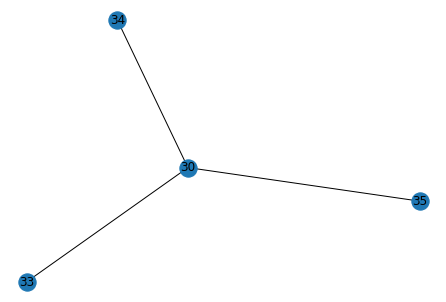

match_branches = [[30, 33]]
edges_to_delete (resolve crossover) = [[30, 34], [30, 35], [33, 34], [33, 35], [34, 35]]
edges_to_create (resolve crossover) = [[30, 33]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[30, 34], [30, 35], [33, 34], [33, 35], [34, 35]]
edges_to_create = [[30, 33]]
Number of connected components = 3
Comp 0 = {26, 27, 28, 29, 31, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 32, 33, 36}
Comp 2 = {34}
curr_limb_copy.deleted_edges = [[30, 34], [30, 35], [33, 34], [33, 35], [34, 35]]
curr_limb_copy.created_edges = [[30, 33]]
After get best cut: cut_edges = [[30, 34], [30, 35], [33, 34], [33, 35], [34, 35]], added_edges = [[30, 

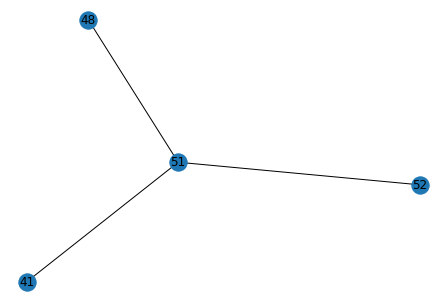

match_branches = [[48, 51], [41, 52]]
edges_to_delete (resolve crossover) = [[41, 48], [41, 51], [48, 52], [51, 52]]
edges_to_create (resolve crossover) = [[48, 51], [41, 52]]
curr_limb.deleted_edges 5 =[[30, 34], [30, 35], [33, 34], [33, 35], [34, 35]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[41, 48], [41, 51], [48, 52], [51, 52]]
edges_to_create = [[48, 51], [41, 52]]
Number of connected components = 5
Comp 0 = {26, 27, 28, 29, 31, 35, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96}
Comp 1 = {41, 52}
Comp 2 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 32, 33, 36}
Comp 3 = {34}
Comp 4 = {73}
curr_limb_copy.deleted_edges = [[30, 34], [30, 35], [33, 34], [33, 35], [34, 35], [41, 48], [41, 51], [48, 52], [51, 52]]
curr_limb_copy.created_edges

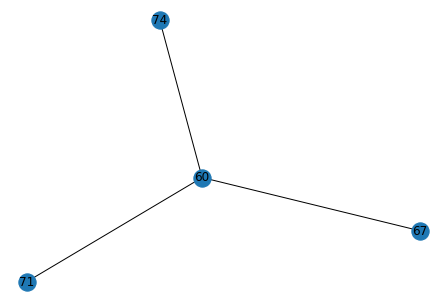

match_branches = []
edges_to_delete (resolve crossover) = [[60, 67], [60, 71], [60, 74], [67, 71], [67, 74], [71, 74]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[[30, 34], [30, 35], [33, 34], [33, 35], [34, 35], [41, 48], [41, 51], [48, 52], [51, 52]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[60, 67], [60, 71], [60, 74], [67, 71], [67, 74], [71, 74]]
edges_to_create = []
Number of connected components = 8
Comp 0 = {96, 68, 74, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 94, 95}
Comp 1 = {26, 27, 28, 29, 31, 35, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 57, 58, 60, 61}
Comp 2 = {64, 65, 67}
Comp 3 = {66, 69, 70, 71, 72, 40, 91, 75, 76, 77, 56, 59, 92, 62, 63}
Comp 4 = {41, 52}
Comp 5 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 32, 33, 36}
Comp 6 = {34}
Comp 7 = {73}
curr_limb_copy.deleted_edges = [[30, 34], [30, 35], [33, 34], [33, 35], [34, 35], [41, 48], [4

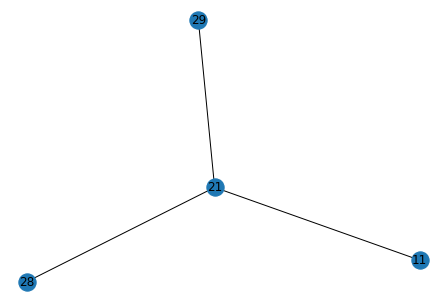

match_branches = [[21, 28]]
edges_to_delete (resolve crossover) = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
edges_to_create (resolve crossover) = [[21, 28]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 74 because skeletal distance was 101.60639530813745 and threshold was 2500
skip_nodes = [74]
edges_to_delete (cut_limb_network) = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
edges_to_create = [[21, 28]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 76, 77}
Comp 1 = {11}
Comp 2 = {72, 9, 75, 47, 29}
curr_limb_copy.deleted_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
curr_limb_copy.created_edges = [[21, 28]]
After get best cut: cut_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]], ad

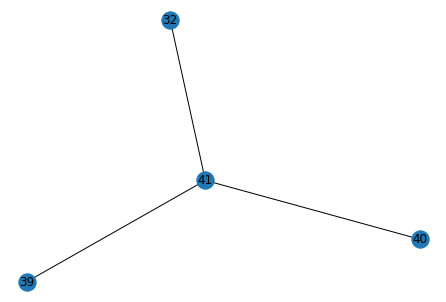

match_branches = [[32, 41]]
edges_to_delete (resolve crossover) = [[32, 39], [32, 40], [39, 40], [39, 41], [40, 41]]
edges_to_create (resolve crossover) = [[32, 41]]
curr_limb.deleted_edges 5 =[[11, 21], [11, 28], [11, 29], [21, 29], [28, 29]]
Skipping endnode 74 because skeletal distance was 101.60639530813745 and threshold was 2500
skip_nodes = [74]
edges_to_delete (cut_limb_network) = [[32, 39], [32, 40], [39, 40], [39, 41], [40, 41]]
edges_to_create = [[32, 41]]
Number of connected components = 5
Comp 0 = {4, 8, 12, 13, 15, 16, 21, 25, 28, 32, 34, 35, 36, 41, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 65, 66, 68, 69, 73, 74}
Comp 1 = {11}
Comp 2 = {72, 9, 75, 47, 29}
Comp 3 = {0, 1, 2, 3, 5, 6, 7, 10, 14, 17, 18, 19, 20, 22, 23, 24, 26, 27, 30, 31, 33, 37, 38, 39, 42, 43, 44, 45, 46, 62, 63, 64, 67, 76, 77}
Comp 4 = {40, 70, 71}
curr_limb_copy.deleted_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29], [32, 39], [32, 40], [39, 40], [39, 41], [40, 41]]
curr_limb_

  Edge: [61 58]: curr_angle = 62.54
  Edge: [58 55]: curr_angle = 23.05
  Edge: [55 54]: curr_angle = 13.22
  Edge: [54 41]: curr_angle = 6.83
  Edge: [41 32]: curr_angle = 19.83
  Edge: [32 21]: curr_angle = 37.01
  Edge: [21 28]: curr_angle = 9.97
  Edge: [28 34]: curr_angle = 3.04
  Edge: [34 36]: curr_angle = 130.36
  Edge: [36 73]: curr_angle = 44.2

Total time for doubling_back = 2.1158602237701416
There were 1 edges that passed doubling back threshold of 100
Winning edge [34 36] had a doubling back of 130.35759779681874
***inside resolve crossover!!!!****
coordinate_branches = [12, 34, 36]
12 = red
34 = aqua
36 = purple
Angle between 12 and 34 = 14.15 
Angle between 12 and 36 = 48.62 
Angle between 34 and 36 = 139.17 
Final Matches = [[12, 34]]
matched_branches_revised = [[12, 34]]
Original graph


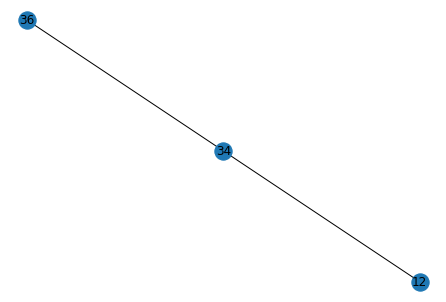

match_branches = [[12, 34]]
edges_to_delete (resolve crossover) = [[12, 36], [34, 36]]
edges_to_create (resolve crossover) = [[12, 34]]
edges_to_delete (cut_limb_network) = [array([12, 36]), array([34, 36])]
edges_to_create = [[12, 34]]
Number of connected components = 6
Comp 0 = {65, 66, 36, 69, 68, 8, 73, 74, 15, 16, 25}
Comp 1 = {4, 12, 13, 21, 28, 32, 34, 35, 41, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
Comp 2 = {11}
Comp 3 = {72, 9, 75, 47, 29}
Comp 4 = {0, 1, 2, 3, 5, 6, 7, 10, 14, 17, 18, 19, 20, 22, 23, 24, 26, 27, 30, 31, 33, 37, 38, 39, 42, 43, 44, 45, 46, 62, 63, 64, 67, 76, 77}
Comp 5 = {40, 70, 71}
curr_limb_copy.deleted_edges = [[11, 21], [11, 28], [11, 29], [21, 29], [28, 29], [32, 39], [32, 40], [39, 40], [39, 41], [40, 41], array([12, 36]), array([34, 36])]
curr_limb_copy.created_edges = [[21, 28], [32, 41], [12, 34]]
After get best cut: cut_edges = [array([12, 36]), array([34, 36])], added_edges = [[12, 34]]
total_soma_paths_to_cut = [[11, 21], [11, 28]

  Edge: [20 18]: curr_angle = 33.14
  Edge: [18 17]: curr_angle = 20.18
  Edge: [17 13]: curr_angle = 18.27
  Edge: [13  9]: curr_angle = 27.9
  Edge: [9 8]: curr_angle = 13.75
  Edge: [ 8 11]: curr_angle = 155.7
  Edge: [11 14]: curr_angle = 58.35
  Edge: [14 40]: curr_angle = 80.91
  Edge: [40 34]: curr_angle = 76.89
  Edge: [34 23]: curr_angle = 67.15

Total time for doubling_back = 0.7752439975738525
There were 1 edges that passed doubling back threshold of 100
Winning edge [ 8 11] had a doubling back of 155.69649710323148
***inside resolve crossover!!!!****
coordinate_branches = [6, 8, 11]
6 = red
8 = aqua
11 = purple
Angle between 6 and 8 = 22.16 
Angle between 6 and 11 = 5.01 
Angle between 8 and 11 = 158.46 
Final Matches = [[6, 8], [6, 11]]
matched_branches_revised = [[6, 11]]
Original graph


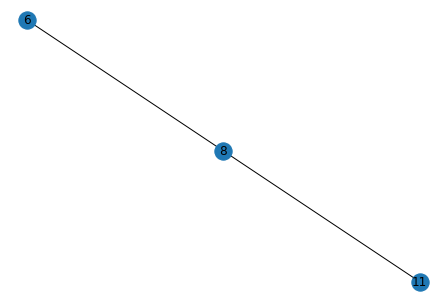

match_branches = [[6, 11]]
edges_to_delete (resolve crossover) = [[6, 8], [8, 11]]
edges_to_create (resolve crossover) = [[6, 11]]
edges_to_delete (cut_limb_network) = [array([6, 8]), array([ 8, 11])]
edges_to_create = [[6, 11]]
Number of connected components = 2
Comp 0 = {0, 2, 3, 4, 5, 8, 9, 10, 12, 13, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 41, 42, 43, 44}
Comp 1 = {1, 34, 33, 6, 7, 40, 38, 39, 11, 14, 16, 23}
curr_limb_copy.deleted_edges = [array([6, 8]), array([ 8, 11])]
curr_limb_copy.created_edges = [[6, 11]]
After get best cut: cut_edges = [array([6, 8]), array([ 8, 11])], added_edges = [[6, 11]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  2,  3,  4,  5,  8

  Edge: [63 62]: curr_angle = 36.28
  Edge: [62 61]: curr_angle = 143.56
  Edge: [61 65]: curr_angle = 43.04

Total time for doubling_back = 0.19423460960388184
There were 1 edges that passed doubling back threshold of 100
Winning edge [62 61] had a doubling back of 143.5575844398125
***inside resolve crossover!!!!****
coordinate_branches = [44, 61, 62]
44 = red
61 = aqua
62 = purple
Angle between 44 and 61 = 35.96 
Angle between 44 and 62 = 6.05 
Angle between 61 and 62 = 139.39 
Final Matches = [[44, 62]]
matched_branches_revised = [[44, 62]]
Original graph


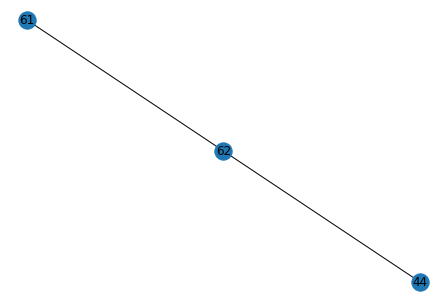

match_branches = [[44, 62]]
edges_to_delete (resolve crossover) = [[44, 61], [61, 62]]
edges_to_create (resolve crossover) = [[44, 62]]
edges_to_delete (cut_limb_network) = [array([44, 61]), array([61, 62])]
edges_to_create = [[44, 62]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 62, 63}
Comp 1 = {64, 65, 58, 59, 61}
curr_limb_copy.deleted_edges = [array([44, 61]), array([61, 62])]
curr_limb_copy.created_edges = [[44, 62]]
After get best cut: cut_edges = [array([44, 61]), array([61, 62])], added_edges = [[44, 62]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the 

  Edge: [3 4]: curr_angle = 130.06

Total time for doubling_back = 0.15503191947937012
There were 1 edges that passed doubling back threshold of 100
Winning edge [3 4] had a doubling back of 130.05829312504613
***inside resolve crossover!!!!****
coordinate_branches = [3, 4, 5]
3 = red
4 = aqua
5 = purple
Angle between 3 and 4 = 137.51 
Angle between 3 and 5 = 30.84 
Angle between 4 and 5 = 44.63 
Final Matches = [[3, 5]]
matched_branches_revised = [[3, 5]]
Original graph


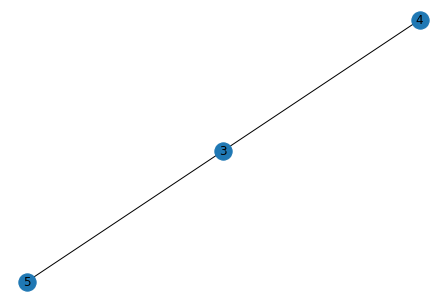

match_branches = [[3, 5]]
edges_to_delete (resolve crossover) = [[3, 4], [4, 5]]
edges_to_create (resolve crossover) = [[3, 5]]
edges_to_delete (cut_limb_network) = [array([3, 4]), array([4, 5])]
edges_to_create = [[3, 5]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12}
Comp 1 = {4}
curr_limb_copy.deleted_edges = [array([3, 4]), array([4, 5])]
curr_limb_copy.created_edges = [[3, 5]]
After get best cut: cut_edges = [array([3, 4]), array([4, 5])], added_edges = [[3, 5]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12]), array([4])]


 -------- Working on limb 8------------
Starting combinations to process = [[8 9]]


---- working 

  Edge: [8 7]: curr_angle = 21.26
  Edge: [7 4]: curr_angle = 49.46
  Edge: [4 5]: curr_angle = 161.47
  Edge: [5 9]: curr_angle = 46.84

Total time for doubling_back = 0.5105726718902588
There were 1 edges that passed doubling back threshold of 100
Winning edge [4 5] had a doubling back of 161.46927786040672
***inside resolve crossover!!!!****
coordinate_branches = [2, 4, 5]
2 = red
4 = aqua
5 = purple
Angle between 2 and 4 = 43.04 
Angle between 2 and 5 = 27.85 
Angle between 4 and 5 = 130.63 
Final Matches = [[2, 5]]
matched_branches_revised = [[2, 5]]
Original graph


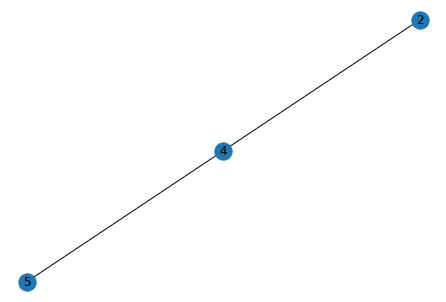

match_branches = [[2, 5]]
edges_to_delete (resolve crossover) = [[2, 4], [4, 5]]
edges_to_create (resolve crossover) = [[2, 5]]
edges_to_delete (cut_limb_network) = [array([2, 4]), array([4, 5])]
edges_to_create = [[2, 5]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 5, 9, 10}
Comp 1 = {3, 4, 6, 7, 8}
curr_limb_copy.deleted_edges = [array([2, 4]), array([4, 5])]
curr_limb_copy.created_edges = [[2, 5]]
After get best cut: cut_edges = [array([2, 4]), array([4, 5])], added_edges = [[2, 5]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  2,  5,  9, 10]), array([3, 4, 6, 7, 8])]


 ------ Total time for Splitting 864691136618586765 = 240.42723846435547 ------


----- Working on Neuron 864691135725

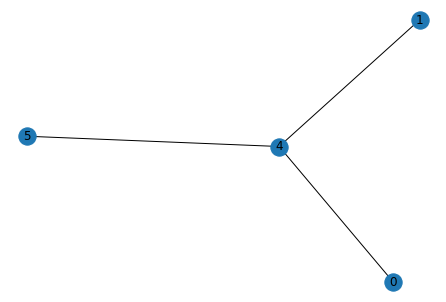

match_branches = [[0, 5]]
edges_to_delete (resolve crossover) = [[0, 1], [0, 4], [1, 4], [1, 5], [4, 5]]
edges_to_create (resolve crossover) = [[0, 5]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 1], [0, 4], [1, 4], [1, 5], [4, 5]]
edges_to_create = [[0, 5]]
Number of connected components = 4
Comp 0 = {0, 2, 5, 6, 7, 8, 11, 12, 13}
Comp 1 = {1}
Comp 2 = {9, 10, 4}
Comp 3 = {3}
curr_limb_copy.deleted_edges = [[0, 1], [0, 4], [1, 4], [1, 5], [4, 5]]
curr_limb_copy.created_edges = [[0, 5]]
After get best cut: cut_edges = [[0, 1], [0, 4], [1, 4], [1, 5], [4, 5]], added_edges = [[0, 5]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 4: [array([ 0,  2,  5,  6,  7,  8, 11, 12, 13]), 

  Edge: [3 4]: curr_angle = 35.99
  Edge: [4 5]: curr_angle = 22.81
  Edge: [ 5 10]: curr_angle = 141.87
  Edge: [10  8]: curr_angle = 20.07

Total time for doubling_back = 0.4115560054779053
There were 1 edges that passed doubling back threshold of 100
Winning edge [ 5 10] had a doubling back of 141.87429338395833
***inside resolve crossover!!!!****
coordinate_branches = [5, 10, 11]
5 = red
10 = aqua
11 = purple
Angle between 5 and 10 = 154.85 
Angle between 5 and 11 = 9.84 
Angle between 10 and 11 = 25.91 
Final Matches = [[5, 11], [10, 11]]
matched_branches_revised = [[5, 11]]
Original graph


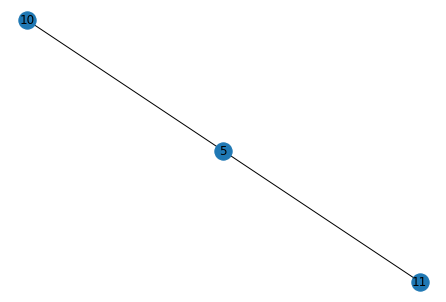

match_branches = [[5, 11]]
edges_to_delete (resolve crossover) = [[5, 10], [10, 11]]
edges_to_create (resolve crossover) = [[5, 11]]
edges_to_delete (cut_limb_network) = [array([ 5, 10]), array([10, 11])]
edges_to_create = [[5, 11]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 11, 12}
Comp 1 = {8, 9, 10}
curr_limb_copy.deleted_edges = [array([ 5, 10]), array([10, 11])]
curr_limb_copy.created_edges = [[5, 11]]
After get best cut: cut_edges = [array([ 5, 10]), array([10, 11])], added_edges = [[5, 11]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  2,  3,  4,  5,  6,  7, 11, 12]), array([ 8,  9, 10])]


 ------ Total time for Splitting 864691135725648447 = 98.26815676689148 -----

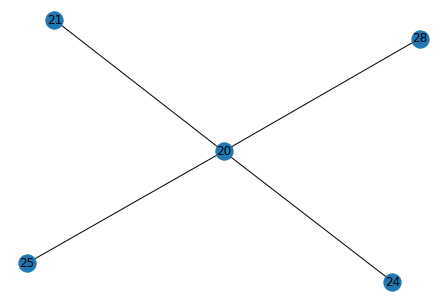

match_branches = [[24, 25], [20, 21]]
edges_to_delete (resolve crossover) = [[20, 24], [20, 25], [20, 28], [21, 24], [21, 25], [21, 28], [24, 28], [25, 28]]
edges_to_create (resolve crossover) = [[24, 25], [20, 21]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 34 because skeletal distance was 120.88139157042743 and threshold was 2500
skip_nodes = [34]
edges_to_delete (cut_limb_network) = [[20, 24], [20, 25], [20, 28], [21, 24], [21, 25], [21, 28], [24, 28], [25, 28]]
edges_to_create = [[24, 25], [20, 21]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 52, 57, 58, 60, 61, 62, 63, 64}
Comp 1 = {20, 21}
Comp 2 = {65, 66, 67, 68, 69, 70, 71, 43, 47, 48, 49, 50, 51, 53, 54, 55, 56, 59, 28}
Comp 3 = {22}
curr_limb_copy.deleted_edges = [[20, 24], [20, 25], [20, 28], [21, 24], [21, 25], [21, 28], [24, 28], [25, 28]]
curr_limb_copy.created

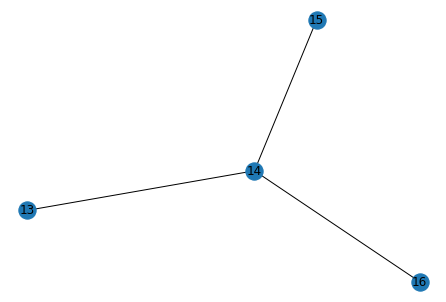

match_branches = [[14, 15], [13, 16]]
edges_to_delete (resolve crossover) = [[13, 14], [13, 15], [14, 16], [15, 16]]
edges_to_create (resolve crossover) = [[14, 15], [13, 16]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[13, 14], [13, 15], [14, 16], [15, 16]]
edges_to_create = [[14, 15], [13, 16]]
Number of connected components = 2
Comp 0 = {2, 4, 5, 6, 7, 14, 15, 17, 18, 19}
Comp 1 = {0, 1, 3, 8, 9, 10, 11, 12, 13, 16}
curr_limb_copy.deleted_edges = [[13, 14], [13, 15], [14, 16], [15, 16]]
curr_limb_copy.created_edges = [[14, 15], [13, 16]]
After get best cut: cut_edges = [[13, 14], [13, 15], [14, 16], [15, 16]], added_edges = [[14, 15], [13, 16]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end 

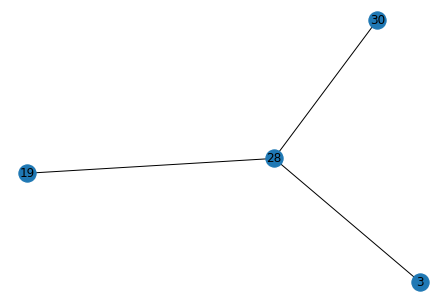

match_branches = [[3, 30], [19, 28]]
edges_to_delete (resolve crossover) = [[3, 19], [3, 28], [19, 30], [28, 30]]
edges_to_create (resolve crossover) = [[3, 30], [19, 28]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[3, 19], [3, 28], [19, 30], [28, 30]]
edges_to_create = [[3, 30], [19, 28]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 32, 33, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,

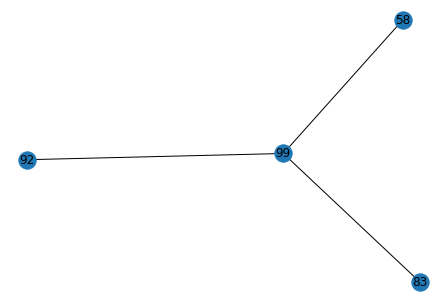

match_branches = [[83, 92], [58, 99]]
edges_to_delete (resolve crossover) = [[58, 83], [58, 92], [83, 99], [92, 99]]
edges_to_create (resolve crossover) = [[83, 92], [58, 99]]
curr_limb.deleted_edges 5 =[[3, 19], [3, 28], [19, 30], [28, 30]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[58, 83], [58, 92], [83, 99], [92, 99]]
edges_to_create = [[83, 92], [58, 99]]
Number of connected components = 6
Comp 0 = {1, 2, 4, 7, 10, 13, 14, 19, 20, 21, 22, 23, 25, 28, 32, 33, 34, 38, 41, 43, 46, 47, 50, 51, 56, 62, 63, 67, 68, 69, 78, 79, 80, 82, 83, 84, 88, 92, 105, 107, 109}
Comp 1 = {0, 5, 9, 11, 12, 15, 16, 18, 24, 29, 36, 39, 40, 42, 44, 45, 48, 52, 53, 54, 55, 57, 58, 59, 60, 61, 64, 65, 66, 70, 71, 72, 73, 74, 75, 76, 77, 81, 85, 86, 87, 89, 90, 91, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 

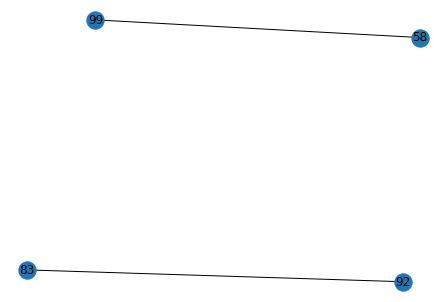

match_branches = [[83, 92], [58, 99]]
edges_to_delete (resolve crossover) = [[58, 83], [58, 92], [83, 99], [92, 99]]
edges_to_create (resolve crossover) = [[83, 92], [58, 99]]
curr_limb.deleted_edges 5 =[[3, 19], [3, 28], [19, 30], [28, 30], [58, 83], [58, 92], [83, 99], [92, 99]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[58, 83], [58, 92], [83, 99], [92, 99]]
edges_to_create = [[83, 92], [58, 99]]
Number of connected components = 6
Comp 0 = {1, 2, 4, 7, 10, 13, 14, 19, 20, 21, 22, 23, 25, 28, 32, 33, 34, 38, 41, 43, 46, 47, 50, 51, 56, 62, 63, 67, 68, 69, 78, 79, 80, 82, 83, 84, 88, 92, 105, 107, 109}
Comp 1 = {0, 5, 9, 11, 12, 15, 16, 18, 24, 29, 36, 39, 40, 42, 44, 45, 48, 52, 53, 54, 55, 57, 58, 59, 60, 61, 64, 65, 66, 70, 71, 72, 73, 74, 75, 76, 77, 81, 85, 86, 87, 89, 90, 91, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 

  Edge: [50 32]: curr_angle = 35.68
  Edge: [32 33]: curr_angle = 135.4
  Edge: [33 34]: curr_angle = 77.73
  Edge: [34 46]: curr_angle = 23.9
  Edge: [46 63]: curr_angle = 15.49
  Edge: [ 63 105]: curr_angle = 93.63
  Edge: [105  92]: curr_angle = 29.31
  Edge: [92 83]: curr_angle = 3.74
  Edge: [83 84]: curr_angle = 121.86
No skeletons to stack so returning empty list
No upstream skeletons so doing backup
  Edge: [84 68]: curr_angle = 63.46
  Edge: [68 69]: curr_angle = 1.29
  Edge: [69 67]: curr_angle = 35.53
  Edge: [67 78]: curr_angle = 27.78
  Edge: [78 80]: curr_angle = 7.96

Total time for doubling_back = 0.7457001209259033
There were 2 edges that passed doubling back threshold of 100
Winning edge [32 33] had a doubling back of 135.4027384867352
***inside resolve crossover!!!!****
coordinate_branches = [2, 32, 33]
2 = red
32 = aqua
33 = purple
Angle between 2 and 32 = 38.06 
Angle between 2 and 33 = 52.11 
Angle between 32 and 33 = 134.16 
Final Matches = []
matched_branches_re

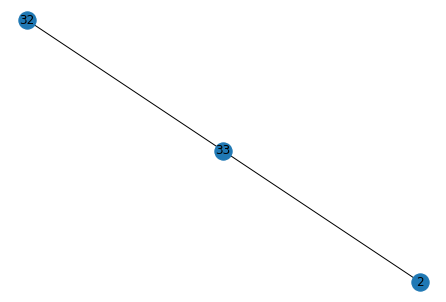

match_branches = []
edges_to_delete (resolve crossover) = [[2, 32], [2, 33], [32, 33]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([ 2, 32]), array([ 2, 33]), array([32, 33])]
edges_to_create = []
Number of connected components = 8
Comp 0 = {1, 7, 14, 21, 22, 25, 33, 34, 41, 46, 51, 56, 62, 63, 67, 68, 69, 78, 79, 80, 82, 83, 84, 88, 92, 105, 107, 109}
Comp 1 = {0, 5, 9, 11, 12, 15, 16, 18, 24, 29, 36, 39, 40, 42, 44, 45, 48, 52, 53, 54, 55, 57, 58, 59, 60, 61, 64, 65, 66, 70, 71, 72, 73, 74, 75, 76, 77, 81, 85, 86, 87, 89, 90, 91, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

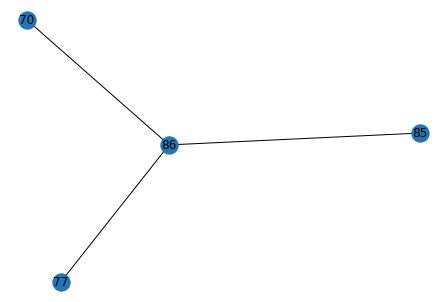

match_branches = [[70, 85]]
edges_to_delete (resolve crossover) = [[70, 77], [70, 86], [77, 85], [77, 86], [85, 86]]
edges_to_create (resolve crossover) = [[70, 85]]
curr_limb.deleted_edges 5 =[[3, 19], [3, 28], [19, 30], [28, 30], [58, 83], [58, 92], [83, 99], [92, 99], [58, 83], [58, 92], [83, 99], [92, 99], array([ 2, 32]), array([ 2, 33]), array([32, 33])]
Skipping endnode 85 because skeletal distance was 669.6099482067949 and threshold was 2500
skip_nodes = [85]
edges_to_delete (cut_limb_network) = [[70, 77], [70, 86], [77, 85], [77, 86], [85, 86]]
edges_to_create = [[70, 85]]
Number of connected components = 12
Comp 0 = {1, 7, 14, 21, 22, 25, 33, 34, 41, 46, 51, 56, 62, 63, 67, 68, 69, 78, 79, 80, 82, 83, 84, 88, 92, 105, 107, 109}
Comp 1 = {5, 9, 15, 16, 29, 36, 39, 40, 44, 45, 48, 53, 54, 55, 57, 58, 60, 86, 87, 90, 91, 94, 99, 100, 101, 102, 108, 110, 111, 112, 115, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 14

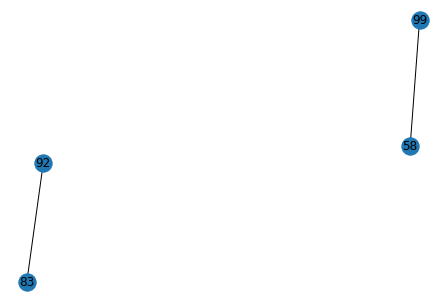

match_branches = [[83, 92], [58, 99]]
edges_to_delete (resolve crossover) = [[58, 83], [58, 92], [83, 99], [92, 99]]
edges_to_create (resolve crossover) = [[83, 92], [58, 99]]
curr_limb.deleted_edges 5 =[[3, 19], [3, 28], [19, 30], [28, 30], [58, 83], [58, 92], [83, 99], [92, 99], [58, 83], [58, 92], [83, 99], [92, 99], array([ 2, 32]), array([ 2, 33]), array([32, 33]), [70, 77], [70, 86], [77, 85], [77, 86], [85, 86]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[58, 83], [58, 92], [83, 99], [92, 99]]
edges_to_create = [[83, 92], [58, 99]]
Number of connected components = 12
Comp 0 = {1, 7, 14, 21, 22, 25, 33, 34, 41, 46, 51, 56, 62, 63, 67, 68, 69, 78, 79, 80, 82, 83, 84, 88, 92, 105, 107, 109}
Comp 1 = {5, 9, 15, 16, 29, 36, 39, 40, 44, 45, 48, 53, 54, 55, 57, 58, 60, 86, 87, 90, 91, 94, 99, 100, 101, 102, 108, 110, 111, 112, 115, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 144, 145, 146, 149, 151, 152, 153, 

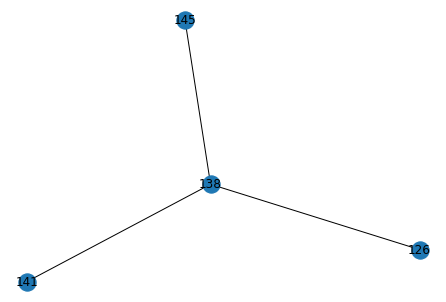

match_branches = [[126, 145], [138, 141]]
edges_to_delete (resolve crossover) = [[126, 138], [126, 141], [138, 145], [141, 145]]
edges_to_create (resolve crossover) = [[126, 145], [138, 141]]
curr_limb.deleted_edges 5 =[[3, 19], [3, 28], [19, 30], [28, 30], [58, 83], [58, 92], [83, 99], [92, 99], [58, 83], [58, 92], [83, 99], [92, 99], array([ 2, 32]), array([ 2, 33]), array([32, 33]), [70, 77], [70, 86], [77, 85], [77, 86], [85, 86], [58, 83], [58, 92], [83, 99], [92, 99]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[126, 138], [126, 141], [138, 145], [141, 145]]
edges_to_create = [[126, 145], [138, 141]]
Number of connected components = 13
Comp 0 = {1, 7, 14, 21, 22, 25, 33, 34, 41, 46, 51, 56, 62, 63, 67, 68, 69, 78, 79, 80, 82, 83, 84, 88, 92, 105, 107, 109}
Comp 1 = {5, 9, 15, 16, 29, 36, 39, 40, 44, 45, 48, 53, 54, 55, 57, 58, 60, 86, 87, 90, 91, 94, 99, 100, 101, 102, 108, 110, 111, 112, 115, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 131, 132, 133, 134, 135, 13

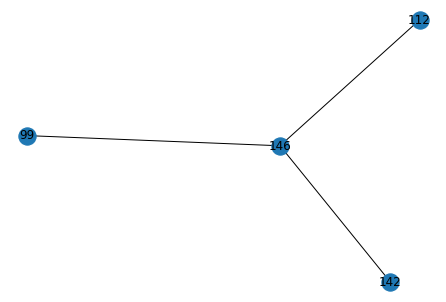

match_branches = [[99, 142], [112, 146]]
edges_to_delete (resolve crossover) = [[99, 112], [99, 146], [112, 142], [142, 146]]
edges_to_create (resolve crossover) = [[99, 142], [112, 146]]
curr_limb.deleted_edges 5 =[[3, 19], [3, 28], [19, 30], [28, 30], [58, 83], [58, 92], [83, 99], [92, 99], [58, 83], [58, 92], [83, 99], [92, 99], array([ 2, 32]), array([ 2, 33]), array([32, 33]), [70, 77], [70, 86], [77, 85], [77, 86], [85, 86], [58, 83], [58, 92], [83, 99], [92, 99], [126, 138], [126, 141], [138, 145], [141, 145]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[99, 112], [99, 146], [112, 142], [142, 146]]
edges_to_create = [[99, 142], [112, 146]]
Number of connected components = 14
Comp 0 = {1, 7, 14, 21, 22, 25, 33, 34, 41, 46, 51, 56, 62, 63, 67, 68, 69, 78, 79, 80, 82, 83, 84, 88, 92, 105, 107, 109}
Comp 1 = {99, 36, 5, 39, 40, 9, 44, 45, 142, 15, 48, 53, 54, 55, 57, 58, 60}
Comp 2 = {128, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 144, 16, 146, 152, 153, 154, 155, 

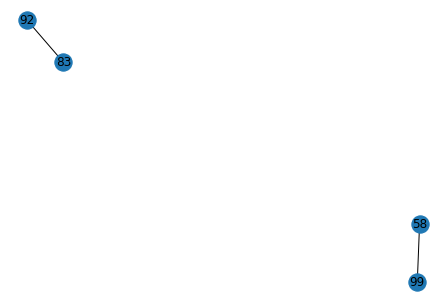

match_branches = [[83, 92], [58, 99]]
edges_to_delete (resolve crossover) = [[58, 83], [58, 92], [83, 99], [92, 99]]
edges_to_create (resolve crossover) = [[83, 92], [58, 99]]
curr_limb.deleted_edges 5 =[[3, 19], [3, 28], [19, 30], [28, 30], [58, 83], [58, 92], [83, 99], [92, 99], [58, 83], [58, 92], [83, 99], [92, 99], array([ 2, 32]), array([ 2, 33]), array([32, 33]), [70, 77], [70, 86], [77, 85], [77, 86], [85, 86], [58, 83], [58, 92], [83, 99], [92, 99], [126, 138], [126, 141], [138, 145], [141, 145], [99, 112], [99, 146], [112, 142], [142, 146]]
Skipping endnode 109 because skeletal distance was 2180.7695717055703 and threshold was 2500
skip_nodes = [109]
edges_to_delete (cut_limb_network) = [[58, 83], [58, 92], [83, 99], [92, 99]]
edges_to_create = [[83, 92], [58, 99]]
Number of connected components = 14
Comp 0 = {1, 7, 14, 21, 22, 25, 33, 34, 41, 46, 51, 56, 62, 63, 67, 68, 69, 78, 79, 80, 82, 83, 84, 88, 92, 105, 107, 109}
Comp 1 = {99, 36, 5, 39, 40, 9, 44, 45, 142, 15, 48, 53

  Edge: [80 78]: curr_angle = 5.69
  Edge: [78 67]: curr_angle = 27.78
  Edge: [67 69]: curr_angle = 35.53
  Edge: [69 68]: curr_angle = 1.29
  Edge: [68 84]: curr_angle = 63.46
  Edge: [84 83]: curr_angle = 123.68
  Edge: [83 92]: curr_angle = 3.74
  Edge: [ 92 105]: curr_angle = 29.31

Total time for doubling_back = 0.5407426357269287
There were 1 edges that passed doubling back threshold of 100
Winning edge [84 83] had a doubling back of 123.68351676813904
***inside resolve crossover!!!!****
coordinate_branches = [56, 83, 84]
56 = red
83 = aqua
84 = purple
Angle between 56 and 83 = 26.98 
Angle between 56 and 84 = 56.28 
Angle between 83 and 84 = 110.37 
Final Matches = [[56, 83]]
matched_branches_revised = [[56, 83]]
Original graph


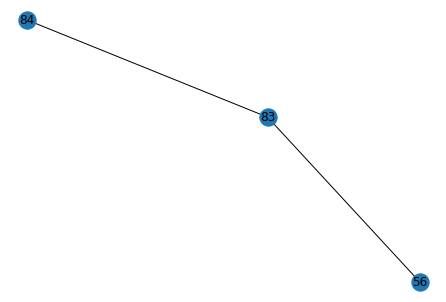

match_branches = [[56, 83]]
edges_to_delete (resolve crossover) = [[56, 84], [83, 84]]
edges_to_create (resolve crossover) = [[56, 83]]
edges_to_delete (cut_limb_network) = [array([56, 84]), array([83, 84])]
edges_to_create = [[56, 83]]
Number of connected components = 15
Comp 0 = {67, 68, 69, 7, 107, 78, 79, 80, 14, 82, 51, 84, 22, 88, 62}
Comp 1 = {1, 34, 33, 105, 41, 109, 46, 83, 21, 56, 25, 92, 63}
Comp 2 = {99, 36, 5, 39, 40, 9, 44, 45, 142, 15, 48, 53, 54, 55, 57, 58, 60}
Comp 3 = {128, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 144, 16, 146, 152, 153, 154, 155, 29, 158, 159, 160, 161, 166, 167, 171, 173, 174, 177, 178, 179, 182, 186, 187, 190, 194, 195, 197, 198, 199, 200, 201, 202, 206, 207, 208, 209, 210, 86, 87, 90, 91, 94, 100, 101, 102, 108, 110, 111, 112, 115, 117, 118, 119, 120, 121, 122, 123, 124, 127}
Comp 4 = {145, 149, 126, 151}
Comp 5 = {2}
Comp 6 = {32, 4, 38, 10, 43, 13, 47, 50, 19, 20, 23, 28}
Comp 7 = {0, 129, 137, 11, 18, 147, 148, 150, 24, 162, 163, 164,

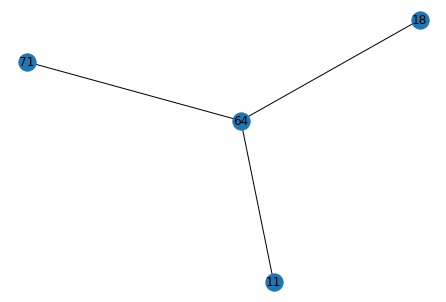

match_branches = [[11, 71]]
edges_to_delete (resolve crossover) = [[11, 18], [11, 64], [18, 64], [18, 71], [64, 71]]
edges_to_create (resolve crossover) = [[11, 71]]
curr_limb.deleted_edges 5 =[[3, 19], [3, 28], [19, 30], [28, 30], [58, 83], [58, 92], [83, 99], [92, 99], [58, 83], [58, 92], [83, 99], [92, 99], array([ 2, 32]), array([ 2, 33]), array([32, 33]), [70, 77], [70, 86], [77, 85], [77, 86], [85, 86], [58, 83], [58, 92], [83, 99], [92, 99], [126, 138], [126, 141], [138, 145], [141, 145], [99, 112], [99, 146], [112, 142], [142, 146], [58, 83], [58, 92], [83, 99], [92, 99], array([56, 84]), array([83, 84])]
Skipping endnode 85 because skeletal distance was 669.6099482067949 and threshold was 2500
skip_nodes = [85]
edges_to_delete (cut_limb_network) = [[11, 18], [11, 64], [18, 64], [18, 71], [64, 71]]
edges_to_create = [[11, 71]]
Number of connected components = 18
Comp 0 = {67, 68, 69, 7, 107, 78, 79, 80, 14, 82, 51, 84, 22, 88, 62}
Comp 1 = {1, 34, 33, 105, 41, 109, 46, 83, 21, 

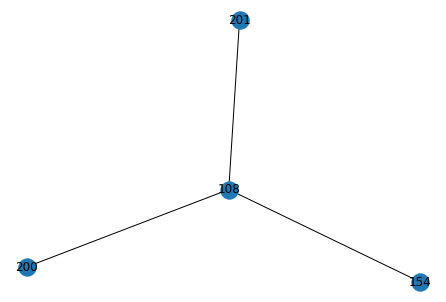

match_branches = [[154, 201], [108, 200]]
edges_to_delete (resolve crossover) = [[108, 154], [108, 201], [154, 200], [200, 201]]
edges_to_create (resolve crossover) = [[154, 201], [108, 200]]
curr_limb.deleted_edges 5 =[[3, 19], [3, 28], [19, 30], [28, 30], [58, 83], [58, 92], [83, 99], [92, 99], [58, 83], [58, 92], [83, 99], [92, 99], array([ 2, 32]), array([ 2, 33]), array([32, 33]), [70, 77], [70, 86], [77, 85], [77, 86], [85, 86], [58, 83], [58, 92], [83, 99], [92, 99], [126, 138], [126, 141], [138, 145], [141, 145], [99, 112], [99, 146], [112, 142], [142, 146], [58, 83], [58, 92], [83, 99], [92, 99], array([56, 84]), array([83, 84]), [11, 18], [11, 64], [18, 64], [18, 71], [64, 71]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[108, 154], [108, 201], [154, 200], [200, 201]]
edges_to_create = [[154, 201], [108, 200]]
Number of connected components = 19
Comp 0 = {67, 68, 69, 7, 107, 78, 14, 80, 79, 82, 51, 84, 22, 88, 62}
Comp 1 = {1, 34, 33, 105, 41, 109, 46, 83, 21, 56, 2

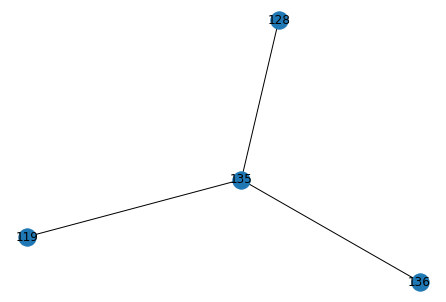

match_branches = []
edges_to_delete (resolve crossover) = [[119, 128], [119, 135], [119, 136], [128, 135], [128, 136], [135, 136]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[[3, 19], [3, 28], [19, 30], [28, 30], [58, 83], [58, 92], [83, 99], [92, 99], [58, 83], [58, 92], [83, 99], [92, 99], array([ 2, 32]), array([ 2, 33]), array([32, 33]), [70, 77], [70, 86], [77, 85], [77, 86], [85, 86], [58, 83], [58, 92], [83, 99], [92, 99], [126, 138], [126, 141], [138, 145], [141, 145], [99, 112], [99, 146], [112, 142], [142, 146], [58, 83], [58, 92], [83, 99], [92, 99], array([56, 84]), array([83, 84]), [11, 18], [11, 64], [18, 64], [18, 71], [64, 71], [108, 154], [108, 201], [154, 200], [200, 201]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[119, 128], [119, 135], [119, 136], [128, 135], [128, 136], [135, 136]]
edges_to_create = []
Number of connected components = 22
Comp 0 = {67, 68, 69, 7, 107, 78, 14, 80, 79, 82, 51, 84, 22, 88, 62}
Comp 1 = {1, 34, 33, 1

  Edge: [ 87 101]: curr_angle = 54.89
  Edge: [101 131]: curr_angle = 18.46
  Edge: [131 132]: curr_angle = 135.87
  Edge: [132 187]: curr_angle = 142.44
  Edge: [187 178]: curr_angle = 7.81
  Edge: [178 167]: curr_angle = 13.29
  Edge: [167 134]: curr_angle = 4.92

Total time for doubling_back = 0.6787741184234619
There were 2 edges that passed doubling back threshold of 100
Winning edge [132 187] had a doubling back of 142.44055282904262
***inside resolve crossover!!!!****
coordinate_branches = [132, 187, 190]
132 = red
187 = aqua
190 = purple
Angle between 132 and 187 = 160.05 
Angle between 132 and 190 = 41.45 
Angle between 187 and 190 = 23.24 
Final Matches = [[187, 190]]
matched_branches_revised = [[187, 190]]
Original graph


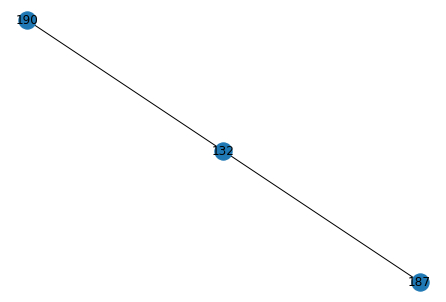

match_branches = [[187, 190]]
edges_to_delete (resolve crossover) = [[132, 187], [132, 190]]
edges_to_create (resolve crossover) = [[187, 190]]
edges_to_delete (cut_limb_network) = [array([132, 187]), array([132, 190])]
edges_to_create = [[187, 190]]
Number of connected components = 23
Comp 0 = {67, 68, 69, 7, 107, 78, 14, 80, 79, 82, 51, 84, 22, 88, 62}
Comp 1 = {1, 34, 33, 105, 41, 109, 46, 83, 21, 56, 25, 92, 63}
Comp 2 = {99, 36, 5, 39, 40, 9, 44, 45, 142, 15, 48, 53, 54, 55, 57, 58, 60}
Comp 3 = {131, 132, 135, 138, 139, 141, 144, 146, 152, 29, 158, 159, 182, 194, 195, 197, 200, 87, 100, 101, 108, 112}
Comp 4 = {145, 149, 126, 151}
Comp 5 = {119}
Comp 6 = {128, 160, 161, 122, 123, 155, 86, 120, 121, 90, 91, 124}
Comp 7 = {136, 171, 140, 173, 174}
Comp 8 = {2}
Comp 9 = {32, 4, 38, 10, 43, 13, 47, 50, 19, 20, 23, 28}
Comp 10 = {198, 199, 167, 134, 166, 202, 206, 207, 208, 178, 179, 186, 187, 190}
Comp 11 = {0, 129, 137, 147, 150, 24, 162, 163, 164, 165, 168, 169, 42, 170, 172, 175, 

  Edge: [25 26]: curr_angle = 73.64

Total time for doubling_back = 0.04178977012634277

Attempting the width jump check (attempting from both sides)
  Edge: [25 26]: jump = -467.03
Total time for width = 0.011078357696533203
Path starting at 25 had err_edges: []
  Edge: [26 25]: jump = 677.44
Adding error edge [26 25] because width jump was 677.4403555058512
Total time for width = 0.011242389678955078
Path starting at 26 had err_edges: [[26, 25]]
first_error_sizes = [-inf, 677.4403555058512], winning_path = 1
***inside resolve crossover!!!!****
coordinate_branches = [24, 25, 26]
24 = red
25 = aqua
26 = purple
Angle between 24 and 25 = 49.6 
Angle between 24 and 26 = 70.95 
Angle between 25 and 26 = 74.44 
Final Matches = []
matched_branches_revised = []
Original graph


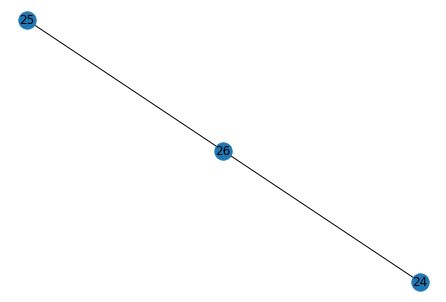

match_branches = []
edges_to_delete (resolve crossover) = [[24, 25], [24, 26], [25, 26]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([24, 25]), array([24, 26]), array([25, 26])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {25}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}
Comp 2 = {26}
curr_limb_copy.deleted_edges = [array([24, 25]), array([24, 26]), array([25, 26])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([24, 25]), array([24, 26]), array([25, 26])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([25]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 

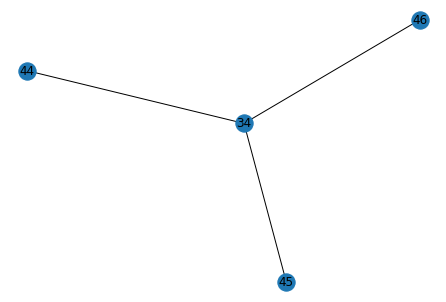

match_branches = [[34, 44]]
edges_to_delete (resolve crossover) = [[34, 45], [34, 46], [44, 45], [44, 46], [45, 46]]
edges_to_create (resolve crossover) = [[34, 44]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 31 because skeletal distance was 943.6818906921036 and threshold was 2500
skip_nodes = [31]
edges_to_delete (cut_limb_network) = [[34, 45], [34, 46], [44, 45], [44, 46], [45, 46]]
edges_to_create = [[34, 44]]
Number of connected components = 3
Comp 0 = {32, 33, 0, 1, 4, 37, 38, 34, 8, 9, 44, 50, 19, 54, 29, 31}
Comp 1 = {2, 3, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 35, 36, 39, 40, 41, 42, 43, 45, 47, 48, 49, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61}
Comp 2 = {46}
curr_limb_copy.deleted_edges = [[34, 45], [34, 46], [44, 45], [44, 46], [45, 46]]
curr_limb_copy.created_edges = [[34, 44]]
After get best cut: cut_edges = [[34, 45], [34, 46], [44, 45], [44, 46], [45, 46]], added_edges = [[34, 44]]
total_soma_paths_to_cut = []
-----------co

  Edge: [34 44]: curr_angle = 14.91
  Edge: [44 37]: curr_angle = 27.72
  Edge: [37 33]: curr_angle = 21.72
  Edge: [33 32]: curr_angle = 33.51

Total time for doubling_back = 0.1287996768951416

Attempting the width jump check (attempting from both sides)
  Edge: [34 44]: jump = -77.43
  Edge: [44 37]: jump = 200.12
Adding error edge [44 37] because width jump was 200.12348781509854
  Edge: [37 33]: jump = 421.48
Adding error edge [37 33] because width jump was 421.48446084048373
  Edge: [33 32]: jump = -87.65
Total time for width = 0.08108210563659668
Path starting at 31 had err_edges: [[44, 37], [37, 33]]
  Edge: [32 33]: jump = 87.65
  Edge: [33 37]: jump = -421.48
  Edge: [37 44]: jump = -269.93
  Edge: [44 34]: jump = -82.14
Total time for width = 0.08446598052978516
Path starting at 32 had err_edges: []
first_error_sizes = [200.12348781509854, -inf], winning_path = 0
***inside resolve crossover!!!!****
coordinate_branches = [37, 44, 50]
37 = red
44 = aqua
50 = purple
Angle betwe

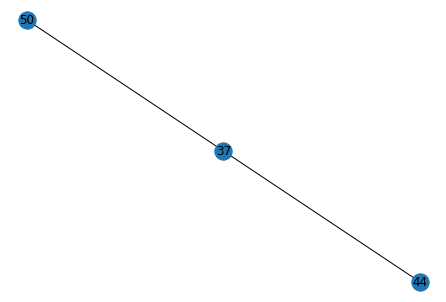

match_branches = []
edges_to_delete (resolve crossover) = [[37, 44], [37, 50], [44, 50]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([37, 44]), array([37, 50]), array([44, 50])]
edges_to_create = []
Number of connected components = 5
Comp 0 = {32, 33, 0, 1, 4, 37, 38, 8, 9}
Comp 1 = {34, 19, 44, 31}
Comp 2 = {50, 29, 54}
Comp 3 = {2, 3, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 35, 36, 39, 40, 41, 42, 43, 45, 47, 48, 49, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61}
Comp 4 = {46}
curr_limb_copy.deleted_edges = [[34, 45], [34, 46], [44, 45], [44, 46], [45, 46], array([37, 44]), array([37, 50]), array([44, 50])]
curr_limb_copy.created_edges = [[34, 44]]
After get best cut: cut_edges = [array([37, 44]), array([37, 50]), array([44, 50])], added_edges = []
total_soma_paths_to_cut = [[34, 45], [34, 46], [44, 45], [44, 46], [45, 46]]
-----------counter = 1------------
 Cut iteration 2
Total number of graphs at the e

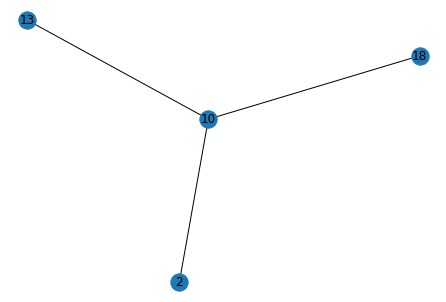

match_branches = [[13, 18]]
edges_to_delete (resolve crossover) = [[2, 10], [2, 13], [2, 18], [10, 13], [10, 18]]
edges_to_create (resolve crossover) = [[13, 18]]
curr_limb.deleted_edges 5 =[[34, 45], [34, 46], [44, 45], [44, 46], [45, 46], array([37, 44]), array([37, 50]), array([44, 50])]
Skipping endnode 42 because skeletal distance was 2282.070413000366 and threshold was 2500
Skipping endnode 51 because skeletal distance was 670.276246288351 and threshold was 2500
skip_nodes = [42, 51]
edges_to_delete (cut_limb_network) = [[2, 10], [2, 13], [2, 18], [10, 13], [10, 18]]
edges_to_create = [[13, 18]]
Number of connected components = 9
Comp 0 = {32, 33, 0, 1, 4, 37, 38, 8, 9}
Comp 1 = {34, 19, 44, 31}
Comp 2 = {50, 29, 54}
Comp 3 = {3, 5, 7, 10, 11, 12, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 35, 36, 40, 41, 42, 43, 45, 47, 53, 58, 59, 60, 61}
Comp 4 = {46}
Comp 5 = {2}
Comp 6 = {6, 39, 13, 15, 49, 18, 51, 52, 55, 56, 57, 30}
Comp 7 = {14}
Comp 8 = {48}
curr_limb_copy.deleted_edges

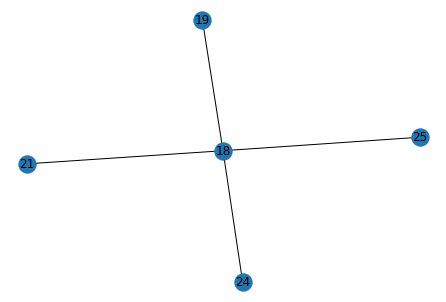

match_branches = [[19, 25]]
edges_to_delete (resolve crossover) = [[18, 19], [18, 21], [18, 24], [18, 25], [19, 21], [19, 24], [21, 24], [21, 25], [24, 25]]
edges_to_create (resolve crossover) = [[19, 25]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 14 because skeletal distance was 1484.4569141412244 and threshold was 2500
skip_nodes = [14]
edges_to_delete (cut_limb_network) = [[18, 19], [18, 21], [18, 24], [18, 25], [19, 21], [19, 24], [21, 24], [21, 25], [24, 25]]
edges_to_create = [[19, 25]]
Number of connected components = 3
Comp 0 = {4, 12, 19, 24, 25, 27, 28, 31, 167, 40, 39, 168, 43, 44, 54, 185, 65, 198, 71, 79, 210, 84, 213, 217, 218, 219, 92, 93, 223, 96, 97, 224, 227, 230, 231, 104, 106, 107, 108, 110, 111}
Comp 1 = {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20, 22, 23, 26, 29, 30, 32, 33, 34, 35, 36, 37, 38, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 

  Edge: [16 20]: curr_angle = 144.48

Total time for doubling_back = 0.05031466484069824
There were 1 edges that passed doubling back threshold of 100
Winning edge [16 20] had a doubling back of 144.4767541759947
***inside resolve crossover!!!!****
coordinate_branches = [16, 20, 26]
16 = red
20 = aqua
26 = purple
Angle between 16 and 20 = 72.08 
Angle between 16 and 26 = 35.0 
Angle between 20 and 26 = 72.96 
Final Matches = [[16, 26]]
matched_branches_revised = [[16, 26]]
Original graph


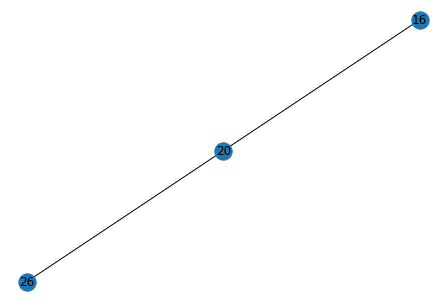

match_branches = [[16, 26]]
edges_to_delete (resolve crossover) = [[16, 20], [20, 26]]
edges_to_create (resolve crossover) = [[16, 26]]
edges_to_delete (cut_limb_network) = [array([16, 20]), array([20, 26])]
edges_to_create = [[16, 26]]
Number of connected components = 4
Comp 0 = {4, 12, 19, 24, 25, 27, 28, 31, 167, 40, 39, 168, 43, 44, 54, 185, 65, 198, 71, 79, 210, 84, 213, 217, 218, 219, 92, 93, 223, 96, 97, 224, 227, 230, 231, 104, 106, 107, 108, 110, 111}
Comp 1 = {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 22, 23, 26, 29, 30, 32, 33, 34, 35, 36, 37, 38, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 94, 95, 98, 99, 100, 101, 102, 103, 105, 109, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 1

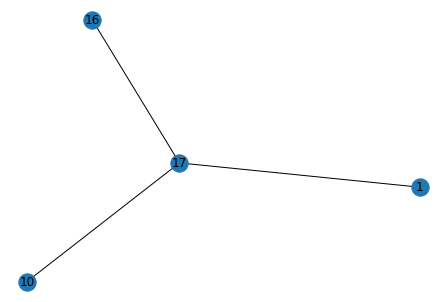

match_branches = [[1, 17], [10, 16]]
edges_to_delete (resolve crossover) = [[1, 10], [1, 16], [10, 17], [16, 17]]
edges_to_create (resolve crossover) = [[1, 17], [10, 16]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 10], [1, 16], [10, 17], [16, 17]]
edges_to_create = [[1, 17], [10, 16]]
Number of connected components = 2
Comp 0 = {1, 3, 8, 11, 12, 13, 14, 15, 17, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}
Comp 1 = {0, 2, 4, 5, 6, 7, 9, 10, 16, 18, 19, 20, 21, 22, 25, 26}
curr_limb_copy.deleted_edges = [[1, 10], [1, 16], [10, 17], [16, 17]]
curr_limb_copy.created_edges = [[1, 17], [10, 16]]
After get best cut: cut_edges = [[1, 10], [1, 16], [10, 17], [16, 17]], added_edges = [[1, 17], [10, 16]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so

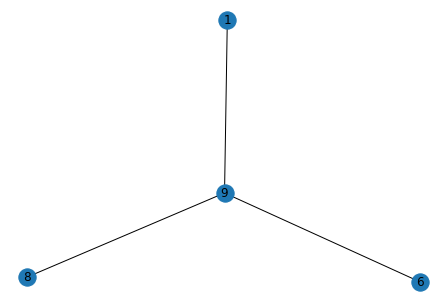

match_branches = [[1, 8], [6, 9]]
edges_to_delete (resolve crossover) = [[1, 6], [1, 9], [6, 8], [8, 9]]
edges_to_create (resolve crossover) = [[1, 8], [6, 9]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 6], [1, 9], [6, 8], [8, 9]]
edges_to_create = [[1, 8], [6, 9]]
Number of connected components = 2
Comp 0 = {0, 2, 3, 4, 5, 6, 9, 11}
Comp 1 = {8, 1, 10, 7}
curr_limb_copy.deleted_edges = [[1, 6], [1, 9], [6, 8], [8, 9]]
curr_limb_copy.created_edges = [[1, 8], [6, 9]]
After get best cut: cut_edges = [[1, 6], [1, 9], [6, 8], [8, 9]], added_edges = [[1, 8], [6, 9]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  2,  3,  4,  5,  6,  9, 11]), array([ 8,  1, 10,  7])]

  Edge: [33 29]: curr_angle = 28.34
  Edge: [29 27]: curr_angle = 7.8
  Edge: [27 25]: curr_angle = 19.42
  Edge: [25 14]: curr_angle = 57.04
  Edge: [14 17]: curr_angle = 38.42
  Edge: [17 15]: curr_angle = 97.14
  Edge: [15 21]: curr_angle = 54.35
  Edge: [21 31]: curr_angle = 22.78
  Edge: [31 35]: curr_angle = 7.82
  Edge: [35 43]: curr_angle = 42.02
  Edge: [43 42]: curr_angle = 24.34
  Edge: [42 45]: curr_angle = 17.41
  Edge: [45 48]: curr_angle = 28.23

Total time for doubling_back = 0.8965818881988525

Attempting the width jump check (attempting from both sides)
  Edge: [33 29]: jump = -30.17
  Edge: [29 27]: jump = 31.43
  Edge: [27 25]: jump = -154.63
  Edge: [25 14]: jump = -261.98
  Edge: [14 17]: jump = -208.03
  Edge: [17 15]: jump = 30.39
  Edge: [15 21]: jump = 245.36
Adding error edge [15 21] because width jump was 245.36266645044554
  Edge: [21 31]: jump = 10.38
  Edge: [31 35]: jump = -69.05
  Edge: [35 43]: jump = 25.89
  Edge: [43 42]: jump = 7.32
  Edge: [42 45]:

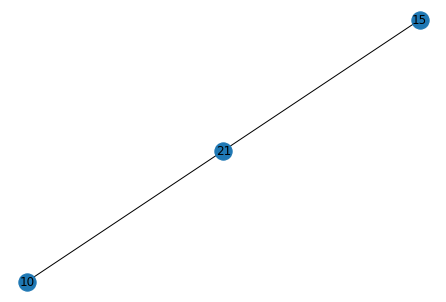

match_branches = [[10, 21]]
edges_to_delete (resolve crossover) = [[10, 15], [15, 21]]
edges_to_create (resolve crossover) = [[10, 21]]
edges_to_delete (cut_limb_network) = [array([10, 15]), array([15, 21])]
edges_to_create = [[10, 21]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 19, 21, 31, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64}
Comp 1 = {5, 8, 9, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 47, 49}
curr_limb_copy.deleted_edges = [array([10, 15]), array([15, 21])]
curr_limb_copy.created_edges = [[10, 21]]
After get best cut: cut_edges = [array([10, 15]), array([15, 21])], added_edges = [[10, 21]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next

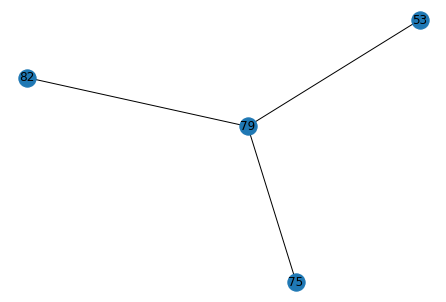

match_branches = [[75, 82]]
edges_to_delete (resolve crossover) = [[53, 75], [53, 79], [53, 82], [75, 79], [79, 82]]
edges_to_create (resolve crossover) = [[75, 82]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 84 because skeletal distance was 221.7786484775194 and threshold was 2500
skip_nodes = [84]
edges_to_delete (cut_limb_network) = [[53, 75], [53, 79], [53, 82], [75, 79], [79, 82]]
edges_to_create = [[75, 82]]
Number of connected components = 3
Comp 0 = {96, 64, 66, 98, 97, 102, 103, 70, 104, 74, 75, 105, 45, 82, 50, 84, 85, 88}
Comp 1 = {34, 36, 40, 53, 29}
Comp 2 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 67, 68, 69, 71, 72, 73, 76, 77, 78, 79, 80, 81, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 99, 100, 101}
curr_limb_copy.deleted_edges = [[53, 75], [53, 79], [53, 82], [75, 79], [79, 82]]
curr_limb_c

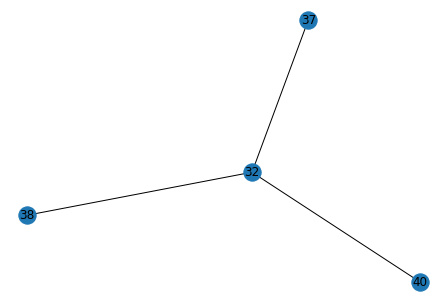

match_branches = [[37, 40]]
edges_to_delete (resolve crossover) = [[32, 37], [32, 38], [32, 40], [37, 38], [38, 40]]
edges_to_create (resolve crossover) = [[37, 40]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[32, 37], [32, 38], [32, 40], [37, 38], [38, 40]]
edges_to_create = [[37, 40]]
Number of connected components = 3
Comp 0 = {0, 2, 3, 6, 7, 8, 10, 11, 14, 17, 18, 19, 20, 21, 22, 25, 28, 29, 30, 31, 33, 35, 36, 37, 38, 40, 41, 47, 48, 49, 50, 51, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66}
Comp 1 = {1, 4, 5, 9, 12, 13, 15, 16, 23, 24, 26, 27, 32, 39, 42, 43, 44, 45, 46, 52, 53}
Comp 2 = {34}
curr_limb_copy.deleted_edges = [[32, 37], [32, 38], [32, 40], [37, 38], [38, 40]]
curr_limb_copy.created_edges = [[37, 40]]
After get best cut: cut_edges = [[32, 37], [32, 38], [32, 40], [37, 38], [38, 40]], added_edges = [[37, 40]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end 

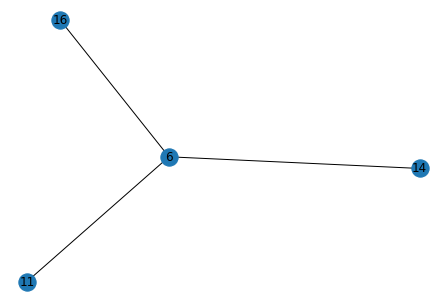

match_branches = [[6, 14], [11, 16]]
edges_to_delete (resolve crossover) = [[6, 11], [6, 16], [11, 14], [14, 16]]
edges_to_create (resolve crossover) = [[6, 14], [11, 16]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[6, 11], [6, 16], [11, 14], [14, 16]]
edges_to_create = [[6, 14], [11, 16]]
Number of connected components = 3
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14}
Comp 1 = {0, 16, 10, 11}
Comp 2 = {15}
curr_limb_copy.deleted_edges = [[6, 11], [6, 16], [11, 14], [14, 16]]
curr_limb_copy.created_edges = [[6, 14], [11, 16]]
After get best cut: cut_edges = [[6, 11], [6, 16], [11, 14], [14, 16]], added_edges = [[6, 14], [11, 16]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 

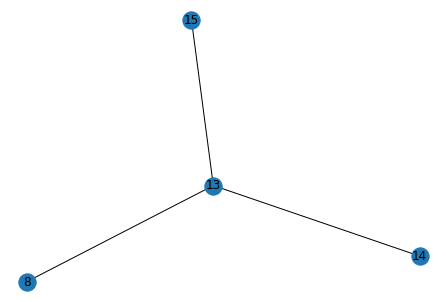

match_branches = [[8, 14], [13, 15]]
edges_to_delete (resolve crossover) = [[8, 13], [8, 15], [13, 14], [14, 15]]
edges_to_create (resolve crossover) = [[8, 14], [13, 15]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 11 because skeletal distance was 2371.7947647957426 and threshold was 2500
skip_nodes = [11]
edges_to_delete (cut_limb_network) = [[8, 13], [8, 15], [13, 14], [14, 15]]
edges_to_create = [[8, 14], [13, 15]]
Number of connected components = 2
Comp 0 = {0, 1, 4, 5, 6, 9, 10, 12, 13, 15, 16, 17}
Comp 1 = {2, 3, 7, 8, 11, 14}
curr_limb_copy.deleted_edges = [[8, 13], [8, 15], [13, 14], [14, 15]]
curr_limb_copy.created_edges = [[8, 14], [13, 15]]
After get best cut: cut_edges = [[8, 13], [8, 15], [13, 14], [14, 15]], added_edges = [[8, 14], [13, 15]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid p

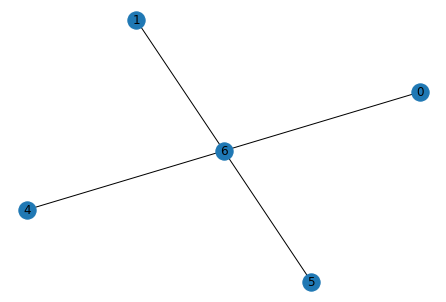

match_branches = [[0, 4], [1, 6]]
edges_to_delete (resolve crossover) = [[0, 1], [0, 5], [0, 6], [1, 4], [1, 5], [4, 5], [4, 6], [5, 6]]
edges_to_create (resolve crossover) = [[0, 4], [1, 6]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 1], [0, 5], [0, 6], [1, 4], [1, 5], [4, 5], [4, 6], [5, 6]]
edges_to_create = [[0, 4], [1, 6]]
Number of connected components = 5
Comp 0 = {0, 11, 4, 7}
Comp 1 = {1, 6, 8, 9, 10, 12, 13, 14}
Comp 2 = {5}
Comp 3 = {2}
Comp 4 = {3}
curr_limb_copy.deleted_edges = [[0, 1], [0, 5], [0, 6], [1, 4], [1, 5], [4, 5], [4, 6], [5, 6]]
curr_limb_copy.created_edges = [[0, 4], [1, 6]]
After get best cut: cut_edges = [[0, 1], [0, 5], [0, 6], [1, 4], [1, 5], [4, 5], [4, 6], [5, 6]], added_edges = [[0, 4], [1, 6]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 5
Total number of graphs at the end of the split AFTER DIRECTIONAL =

  Edge: [50 46]: curr_angle = 28.31
  Edge: [46 40]: curr_angle = 49.79
  Edge: [40 38]: curr_angle = 35.18
  Edge: [38 39]: curr_angle = 39.17
  Edge: [39 65]: curr_angle = 20.6
  Edge: [65 60]: curr_angle = 48.76
  Edge: [60 62]: curr_angle = 95.25
  Edge: [62 59]: curr_angle = 106.38
  Edge: [59 19]: curr_angle = 9.07
  Edge: [19 20]: curr_angle = 168.26
  Edge: [20 54]: curr_angle = 53.11
  Edge: [54 63]: curr_angle = 35.61
  Edge: [63 77]: curr_angle = 37.0
  Edge: [77 79]: curr_angle = 31.35
  Edge: [79 84]: curr_angle = 13.44
  Edge: [84 80]: curr_angle = 0.9

Total time for doubling_back = 0.932485818862915
There were 2 edges that passed doubling back threshold of 100
Winning edge [19 20] had a doubling back of 168.2632984978013
***inside resolve crossover!!!!****
coordinate_branches = [16, 19, 20]
16 = red
19 = aqua
20 = purple
Angle between 16 and 19 = 35.89 
Angle between 16 and 20 = 5.88 
Angle between 19 and 20 = 144.39 
Final Matches = [[16, 20]]
matched_branches_revised 

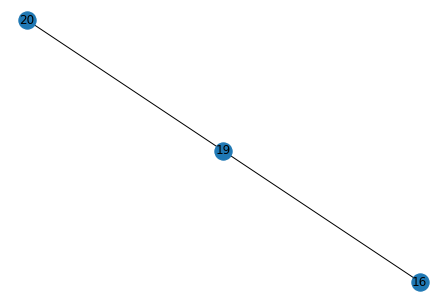

match_branches = [[16, 20]]
edges_to_delete (resolve crossover) = [[16, 19], [19, 20]]
edges_to_create (resolve crossover) = [[16, 20]]
edges_to_delete (cut_limb_network) = [array([16, 19]), array([19, 20])]
edges_to_create = [[16, 20]]
Number of connected components = 2
Comp 0 = {0, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 18, 19, 22, 23, 25, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 87, 88, 89, 90, 91, 92, 93, 94, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114}
Comp 1 = {1, 3, 11, 15, 16, 20, 21, 24, 26, 32, 33, 43, 52, 53, 54, 63, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 95, 96, 97, 98, 99, 100}
curr_limb_copy.deleted_edges = [array([16, 19]), array([19, 20])]
curr_limb_copy.created_edges = [[16, 20]]
After get best cut: cut_edges = [array([16, 19]), array([19, 20])], added_edges = [[16, 20]]
total_soma_paths_to_cut = []
-----------co

  Edge: [50 46]: curr_angle = 28.31
  Edge: [46 40]: curr_angle = 49.79
  Edge: [40 38]: curr_angle = 35.18
  Edge: [38 39]: curr_angle = 39.17
  Edge: [39 65]: curr_angle = 20.6
  Edge: [65 60]: curr_angle = 48.76
  Edge: [60 62]: curr_angle = 95.25
  Edge: [62 68]: curr_angle = 75.05
  Edge: [68 92]: curr_angle = 53.13
  Edge: [92 94]: curr_angle = 8.68
  Edge: [ 94 108]: curr_angle = 16.77
  Edge: [108 109]: curr_angle = 10.28
  Edge: [109 112]: curr_angle = 16.99
  Edge: [112 114]: curr_angle = 2.67

Total time for doubling_back = 0.8403608798980713

Attempting the width jump check (attempting from both sides)
  Edge: [50 46]: jump = -213.29
  Edge: [46 40]: jump = -230.22
  Edge: [40 38]: jump = -190.74
  Edge: [38 39]: jump = -67.2
  Edge: [39 65]: jump = -47.6
  Edge: [65 60]: jump = -343.06
  Edge: [60 62]: jump = -113.48
  Edge: [62 68]: jump = 262.03
Adding error edge [62 68] because width jump was 262.02848082914227
  Edge: [68 92]: jump = 80.55
  Edge: [92 94]: jump = -93.9

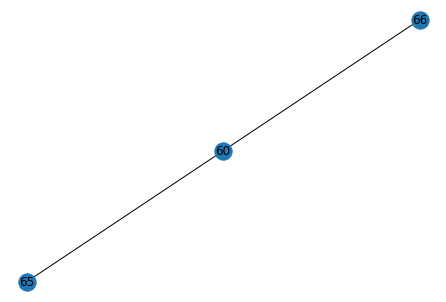

match_branches = [[65, 66]]
edges_to_delete (resolve crossover) = [[60, 65], [60, 66]]
edges_to_create (resolve crossover) = [[65, 66]]
edges_to_delete (cut_limb_network) = [array([60, 65]), array([60, 66])]
edges_to_create = [[65, 66]]
Number of connected components = 3
Comp 0 = {0, 2, 4, 5, 6, 9, 10, 12, 13, 14, 18, 22, 25, 27, 28, 29, 30, 31, 34, 35, 37, 38, 39, 40, 41, 42, 45, 46, 48, 50, 51, 56, 57, 61, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 89, 90}
Comp 1 = {7, 8, 17, 19, 23, 36, 44, 47, 49, 55, 58, 59, 60, 62, 68, 87, 88, 91, 92, 93, 94, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114}
Comp 2 = {1, 3, 11, 15, 16, 20, 21, 24, 26, 32, 33, 43, 52, 53, 54, 63, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 95, 96, 97, 98, 99, 100}
curr_limb_copy.deleted_edges = [array([16, 19]), array([19, 20]), array([60, 65]), array([60, 66])]
curr_limb_copy.created_edges = [[16, 20], [65, 66]]
After get best cut: cut_edges = [array([60, 65]), array([60, 66])], added_edges =

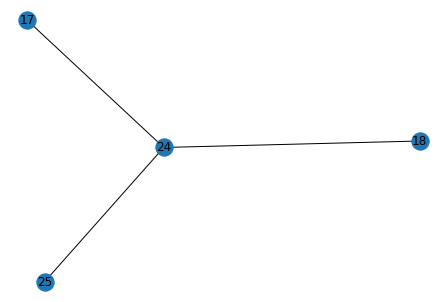

match_branches = [[18, 25], [17, 24]]
edges_to_delete (resolve crossover) = [[17, 18], [17, 25], [18, 24], [24, 25]]
edges_to_create (resolve crossover) = [[18, 25], [17, 24]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 37 because skeletal distance was 1622.9915301622154 and threshold was 2500
skip_nodes = [37]
edges_to_delete (cut_limb_network) = [[17, 18], [17, 25], [18, 24], [24, 25]]
edges_to_create = [[18, 25], [17, 24]]
Number of connected components = 2
Comp 0 = {2, 3, 5, 7, 8, 10, 13, 14, 15, 17, 23, 24, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39}
Comp 1 = {0, 1, 34, 4, 6, 9, 11, 12, 16, 18, 19, 20, 21, 22, 25, 28}
curr_limb_copy.deleted_edges = [[17, 18], [17, 25], [18, 24], [24, 25]]
curr_limb_copy.created_edges = [[18, 25], [17, 24]]
After get best cut: cut_edges = [[17, 18], [17, 25], [18, 24], [24, 25]], added_edges = [[18, 25], [17, 24]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split B

In [11]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")